# Checking glimpse videos

In [3]:
import os
import imageio
import numpy as np
import napari
import glob
from tqdm.auto import tqdm
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from macrohet import visualise
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Liberation Sans'
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)
# Display the colors in the PiYG color map
# visualise.show_colors('expanded_piyg')
# print(expanded_piyg)

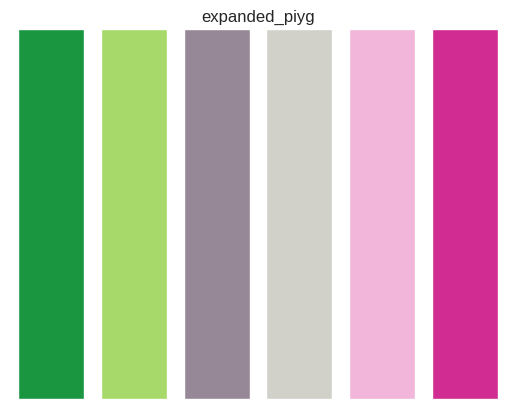

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [4]:
# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

# Load dictionary and mp4 fn info

In [210]:
# Set the base directory where the mp4 files are located
base_directory = "/mnt/DATA/macrohet/PS0000/results/glimpses/fast_grower_area_smoothed_graph/"

# Get a list of all mp4 file paths in the base directory using glob
mp4_fns = glob.glob(f'{base_directory}/*/*/*.mp4')

# Load dictionary to store the classifications
with open('fast_grower_area_smoothed_graph_truth_dict.json', 'r') as file:
        classifications = json.load(file)

In [211]:
len(classifications)

302

# Conduct more classifications

In [ ]:
# Loop through each mp4 file
for fn in tqdm(reversed(mp4_fns), total=len(mp4_fns)):
    try:
        # cell ID 
        unique_cell_ID = fn.split('/')[-2]
    
        # # check if already checked
        # if unique_cell_ID in classifications.keys():
        #     continue
        
        # Get an imageio reader for the current mp4 file
        reader = imageio.get_reader(fn)
    
        # Initialize classification dictionary for each cell
        classifications[unique_cell_ID] = {'True/False': None, 'Uptake': False, 'Shadows': False}
    
        # Print a message to indicate loading images
        print(f'Loading images for {unique_cell_ID}')
        
        # Read all frames from the reader and stack them into a numpy array
        images = np.stack([frame for frame in reader], axis=0)
        
        # Create a napari viewer with the title as the base filename of the current mp4 file
        viewer = napari.Viewer(title=os.path.basename(fn))
        
        # Add the image array to the viewer, with channel axis as -1 and colormap ['red', 'green', 'blue']
        viewer.add_image(images, channel_axis=-1, colormap=['red', 'green', 'blue'])
        
        # Set the current step of the viewer to (0, 0)
        viewer.dims.current_step = (0, 0)
        
        # Define a keyboard binding for the 't' key that classifies the current mp4 file as True
        @viewer.bind_key('t', overwrite=True)
        def classify_true(viewer):
            classifications[unique_cell_ID]['True/False'] = True
            print(f"{os.path.basename(fn)} classified as True")
        
        # Define a keyboard binding for the 'f' key that classifies the current mp4 file as False
        @viewer.bind_key('f', overwrite=True)
        def classify_false(viewer):
            classifications[unique_cell_ID]['True/False'] = False
            print(f"{os.path.basename(fn)} classified as False")
        
        # Define a keyboard binding for the 'u' key that classifies the current mp4 file as Unknown
        @viewer.bind_key('x', overwrite=True)
        def classify_unknown(viewer):
            classifications[unique_cell_ID]['True/False'] = 'Unknown'
            print(f"{os.path.basename(fn)} classified as Unknown")
    
        @viewer.bind_key('u', overwrite=True)
        def classify_uptake(viewer):
            classifications[unique_cell_ID]['Uptake'] = True
            print(f"{os.path.basename(fn)} classified as having Uptake")
    
        # Define a keyboard binding for classifying 'Shadows'
        @viewer.bind_key('s', overwrite=True)
        def classify_shadows(viewer):
            classifications[unique_cell_ID]['Shadows'] = True
            print(f"{os.path.basename(fn)} classified as having Shadows")
    
        # Show the napari viewer and block the execution until the viewer is closed
        viewer.show(block=True)
        
        # Save the classifications dictionary as a JSON file
        with open('fast_grower_area_smoothed_graph_truth_dict.json', 'w') as file:
            json.dump(classifications, file)
    
        print(classifications)
    except: 
        continue

  0%|          | 0/303 [00:00<?, ?it/s]

Loading images for 426.4.8
{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': 

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True}, '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False}, '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False}, '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False}, '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True}, '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False}, '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False}, '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False}, '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False}, '336.4.6': {'True/False': True, 'Uptake': True, 'Shad

# Filtering main df to exclude false tracks

In [178]:
len([i for i in classifications.keys() if classifications[i]['True/False'] == True])

228

In [105]:
classifications

{'587.5.7': {'True/False': True, 'Uptake': False, 'Shadows': True},
 '749.5.7': {'True/False': True, 'Uptake': True, 'Shadows': False},
 '598.5.7': {'True/False': False, 'Uptake': False, 'Shadows': False},
 '261.3.9': {'True/False': None, 'Uptake': True, 'Shadows': False},
 '630.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False},
 '593.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False},
 '264.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False},
 '242.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False},
 '504.3.9': {'True/False': False, 'Uptake': False, 'Shadows': True},
 '209.3.9': {'True/False': True, 'Uptake': True, 'Shadows': False},
 '385.3.9': {'True/False': True, 'Uptake': False, 'Shadows': False},
 '650.6.9': {'True/False': False, 'Uptake': False, 'Shadows': False},
 '240.5.9': {'True/False': True, 'Uptake': False, 'Shadows': False},
 '537.4.6': {'True/False': True, 'Uptake': True, 'Shadows': False},
 '336.4.6': {'True/False': True, 'Uptake

In [106]:
false_classifications = [i for i in classifications.keys() if classifications[i]['True/False'] == False or classifications[i]['True/False'] == None]

In [119]:
len(false_classifications)

74

In [108]:
eff_classifications = [i for i in classifications.keys() if classifications[i]['True/False'] == True and classifications[i]['Uptake'] == True]
len(eff_classifications)

119

In [120]:
df = pd.read_pickle('/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area.pkl')
df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
0,0,46.797680,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,...,0.000000,0.000000,292.26361,473.168976,167.325424,True,True,True,NaN,6.314185
1,1,48.719647,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,...,1.921968,4.106972,292.26361,498.701813,202.661972,True,True,True,NaN,6.314185
2,2,52.206007,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,...,3.486360,7.155963,292.26361,502.468353,210.382874,True,True,True,NaN,6.314185
3,3,50.552221,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,...,-1.653786,-3.167808,292.26361,501.905182,212.070969,True,True,True,NaN,6.314185
4,4,54.463202,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,...,3.910981,7.736516,292.26361,502.564423,204.565842,True,True,True,NaN,6.314185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296992,70,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,32533.0,...,0.000000,0.000000,-100.00000,385.325806,1.178588,True,True,False,0.0,0.064066
296993,71,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,31403.0,...,0.000000,0.000000,-100.00000,384.643707,1.152374,True,True,False,0.0,0.064066
296994,72,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,33239.0,...,0.000000,0.000000,-100.00000,384.512726,1.103884,True,True,False,0.0,0.064066
296995,73,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,42445.0,...,0.000000,0.000000,-100.00000,383.335663,0.893816,True,True,False,0.0,0.064066


In [121]:
filtered_df = df[~df['Unique ID'].isin(false_classifications)]

In [123]:
filtered_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
0,0,46.797680,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,...,0.000000,0.000000,292.26361,473.168976,167.325424,True,True,True,NaN,6.314185
1,1,48.719647,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,...,1.921968,4.106972,292.26361,498.701813,202.661972,True,True,True,NaN,6.314185
2,2,52.206007,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,...,3.486360,7.155963,292.26361,502.468353,210.382874,True,True,True,NaN,6.314185
3,3,50.552221,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,...,-1.653786,-3.167808,292.26361,501.905182,212.070969,True,True,True,NaN,6.314185
4,4,54.463202,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,...,3.910981,7.736516,292.26361,502.564423,204.565842,True,True,True,NaN,6.314185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296992,70,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,32533.0,...,0.000000,0.000000,-100.00000,385.325806,1.178588,True,True,False,0.0,0.064066
296993,71,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,31403.0,...,0.000000,0.000000,-100.00000,384.643707,1.152374,True,True,False,0.0,0.064066
296994,72,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,33239.0,...,0.000000,0.000000,-100.00000,384.512726,1.103884,True,True,False,0.0,0.064066
296995,73,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,42445.0,...,0.000000,0.000000,-100.00000,383.335663,0.893816,True,True,False,0.0,0.064066


In [28]:
filtered_df.to_pickle('/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed.pkl')

# Check  classifications

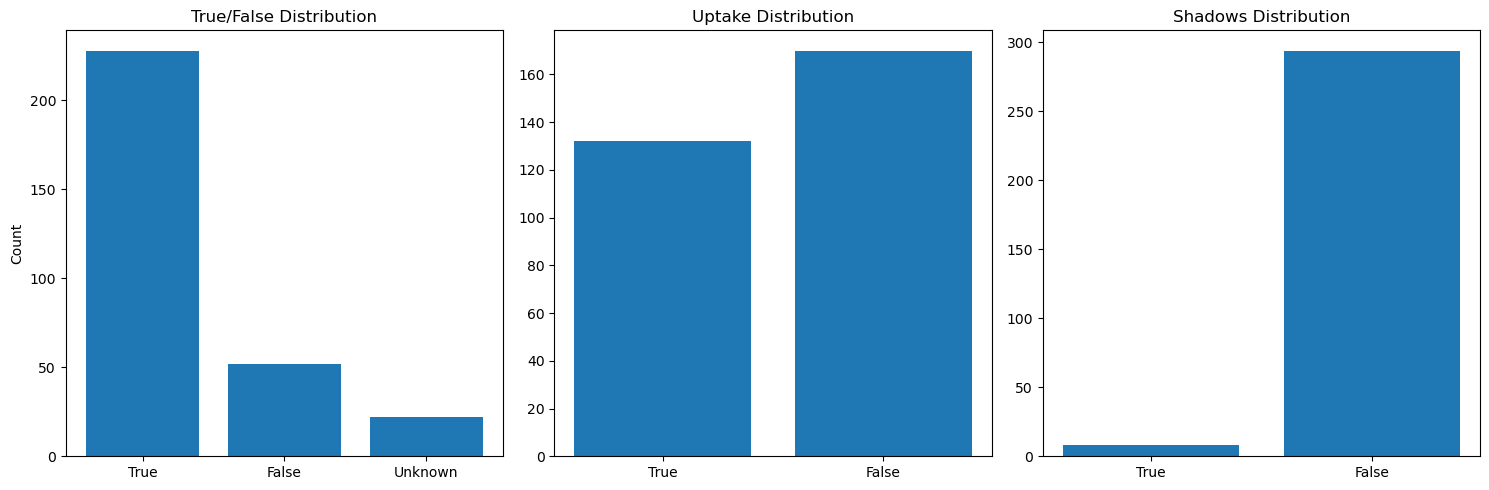

In [21]:
# Initialize counters
true_false_counts = {'True': 0, 'False': 0, 'Unknown': 0,}
uptake_counts = {'True': 0, 'False': 0}
shadows_counts = {'True': 0, 'False': 0}

# Count classifications
for cell in classifications.values():
    true_false_value = cell['True/False']
    if true_false_value is None:
        true_false_counts['Unknown'] += 1
    else:
        true_false_counts[str(true_false_value)] += 1
    uptake_counts[str(cell['Uptake'])] += 1
    shadows_counts[str(cell['Shadows'])] += 1

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(true_false_counts.keys(), true_false_counts.values())
axes[0].set_title('True/False Distribution')
axes[0].set_ylabel('Count')

axes[1].bar(uptake_counts.keys(), uptake_counts.values())
axes[1].set_title('Uptake Distribution')

axes[2].bar(shadows_counts.keys(), shadows_counts.values())
axes[2].set_title('Shadows Distribution')

plt.tight_layout()
plt.show()

### Efferocytotic events vs condition

In [113]:
filtered_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
0,0,46.797680,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,...,0.000000,0.000000,292.26361,473.168976,167.325424,True,True,True,NaN,6.314185
1,1,48.719647,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,...,1.921968,4.106972,292.26361,498.701813,202.661972,True,True,True,NaN,6.314185
2,2,52.206007,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,...,3.486360,7.155963,292.26361,502.468353,210.382874,True,True,True,NaN,6.314185
3,3,50.552221,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,...,-1.653786,-3.167808,292.26361,501.905182,212.070969,True,True,True,NaN,6.314185
4,4,54.463202,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,...,3.910981,7.736516,292.26361,502.564423,204.565842,True,True,True,NaN,6.314185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296992,70,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,32533.0,...,0.000000,0.000000,-100.00000,385.325806,1.178588,True,True,False,0.0,0.064066
296993,71,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,31403.0,...,0.000000,0.000000,-100.00000,384.643707,1.152374,True,True,False,0.0,0.064066
296994,72,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,33239.0,...,0.000000,0.000000,-100.00000,384.512726,1.103884,True,True,False,0.0,0.064066
296995,73,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,42445.0,...,0.000000,0.000000,-100.00000,383.335663,0.893816,True,True,False,0.0,0.064066


In [125]:
filtered_df['Uptake'] = None
## append growth status to main df
for unique_cell_ID in tqdm(classifications.keys(), total = len(classifications.keys())):
    if classifications[unique_cell_ID]['True/False'] == True:
        uptake_status = classifications[unique_cell_ID]['Uptake']
        filtered_df.loc[filtered_df['Unique ID'] == unique_cell_ID, 'Uptake'] = uptake_status

  0%|          | 0/302 [00:00<?, ?it/s]

False
True
True
True
False
True
True
False
False
True
True
True
False
True
True
False
True
True
False
False
False
False
True
True
True
True
False
False
False
False
False
True
False
False
False
True
True
False
True
False
False
True
False
True
True
False
False
True
True
False
False
False
True
False
True
True
True
True
False
True
True
False
True
False
True
True
False
False
False
True
True
False
False
False
False
False
False
False
True
False
True
True
False
False
False
True
True
False
True
False
False
False
False
True
True
True
False
True
False
True
False
True
True
True
True
False
False
False
True
False
False
False
False
True
True
False
True
False
False
True
False
False
False
True
False
False
False
True
False
True
False
True
True
True
True
True
False
False
False
False
True
True
True
False
False
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
False
True
True
False
True
False
True
False
False
False
True
True
False
True
True
False
True
False
True
True
False


In [115]:
custom_order = ['RD1', 'CTRL', 'PZA', 'RIF', 'INH', 'BDQ']

In [103]:
subset_df['Uptake']

0         False
73         True
148        None
222        True
297        None
          ...  
296635    False
296709     None
296784     None
296855     None
296926     None
Name: Uptake, Length: 3988, dtype: object

In [132]:
filtered_df[filtered_df['Uptake'].notna()]['Uptake'].unique()

array([False, True], dtype=object)

In [135]:
strain_order

array(['CTRL', 'BDQ', 'RIF', 'RD1', 'PZA', 'INH'], dtype=object)

In [136]:
concentration_order

['EC0', 'EC50', 'EC99']

In [163]:
output_dir = '/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/cumulative_sc_plots/mtb_area_dec23/'

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

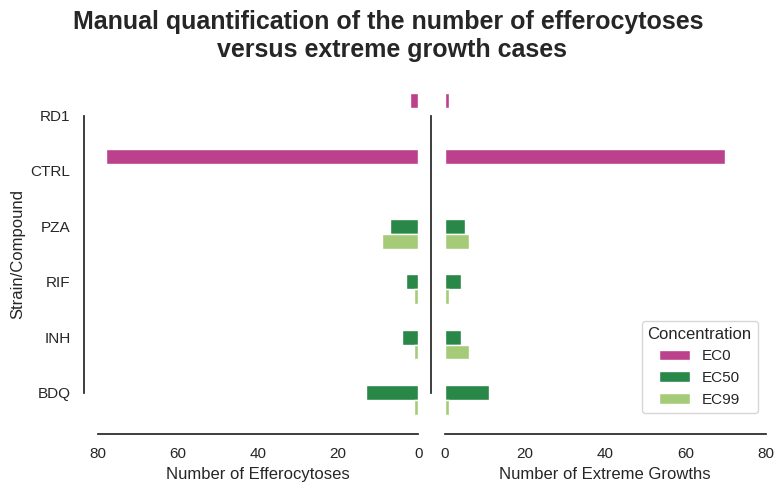

In [168]:
# Remove any NaN values and duplicates based on 'Unique ID' and 'Uptake'
subset_df = filtered_df[filtered_df['Uptake'].notna()].drop_duplicates(subset=['Unique ID', 'Uptake'])

# Filter the dataframe for 'Uptake' being True and False
subset_df_true = subset_df[subset_df['Uptake'] == True]
subset_df_false = subset_df[subset_df['Uptake'] == False]

# Define the order for 'Strain/Compound' and 'Concentration'
strain_order = custom_order #sorted(subset_df['Strain/Compound'].unique())  # Sorting to ensure consistent order
concentration_order = ['EC0', 'EC50', 'EC99']  # Replace with your actual concentration categories

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

# Plot for 'Uptake' True on the left
sns.countplot(y="Strain/Compound", hue="Concentration", data=subset_df_true,
              ax=axes[0], order=strain_order, hue_order=concentration_order, palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]])
# axes[0].set_title("Efferocytosis/Uptake")
axes[0].set_xlabel("Number of Efferocytoses")
axes[0].set_ylabel("Strain/Compound")
# Remove the legend from the first plot
axes[0].get_legend().remove()
axes[0].set_xlim(0,80)
# Invert the x-axis
axes[0].invert_xaxis()
# Find the number of categories to set the limits appropriately
num_categories = len(strain_order)
axes[0].set_ylim(-1, num_categories)  # Start from -1 to include the bottom category
axes[1].set_ylim(-1, num_categories)

# Plot for 'Uptake' False on the right
sns.countplot(y="Strain/Compound", hue="Concentration", data=subset_df_false,
              ax=axes[1], order=strain_order, hue_order=concentration_order, palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]])
# axes[1].set_title("Intracellular Growth")
axes[1].set_xlabel("Number of Extreme Growths")
axes[1].set_ylabel("")
axes[1].set_xlim(0,80)
# General customization
sns.despine(offset=10, trim=True)
fig.suptitle('Manual quantification of the number of efferocytoses \nversus extreme growth cases', fontsize=18, fontweight='bold')
plt.tight_layout()


plt.savefig(os.path.join(output_dir, 'manual_quant_eff_vs_growth_outliers.png'), bbox_inches = 'tight', dpi = 314)
# Show the plot
plt.show()

In [205]:
output_dir

'/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/cumulative_sc_plots/mtb_area_dec23/'

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

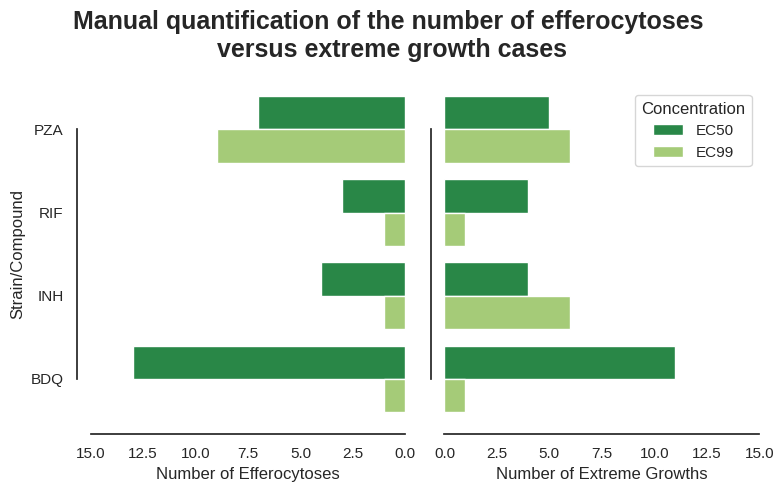

In [208]:
# Remove any NaN values and duplicates based on 'Unique ID' and 'Uptake'
subset_df = filtered_df[filtered_df['Uptake'].notna()].drop_duplicates(subset=['Unique ID', 'Uptake'])

#filter out controls
subset_df = subset_df[subset_df['Concentration'] != 'EC0']

# Filter the dataframe for 'Uptake' being True and False
subset_df_true = subset_df[subset_df['Uptake'] == True]
subset_df_false = subset_df[subset_df['Uptake'] == False]

# Define the order for 'Strain/Compound' and 'Concentration'
strain_order = ['PZA', 'RIF', 'INH', 'BDQ'] #sorted(subset_df['Strain/Compound'].unique())  # Sorting to ensure consistent order
concentration_order = ['EC50', 'EC99']  # Replace with your actual concentration categories

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

# Plot for 'Uptake' True on the left
sns.countplot(y="Strain/Compound", hue="Concentration", data=subset_df_true,
              ax=axes[0], order=strain_order, hue_order=concentration_order, palette=[ expanded_piyg[0], expanded_piyg[1]])
# axes[0].set_title("Efferocytosis/Uptake")
axes[0].set_xlabel("Number of Efferocytoses")
axes[0].set_ylabel("Strain/Compound")
# Remove the legend from the first plot
axes[0].get_legend().remove()
axes[0].set_xlim(0,15)
# Invert the x-axis
axes[0].invert_xaxis()
# Find the number of categories to set the limits appropriately
num_categories = len(strain_order)
axes[0].set_ylim(-1, num_categories)  # Start from -1 to include the bottom category
axes[1].set_ylim(-1, num_categories)

# Plot for 'Uptake' False on the right
sns.countplot(y="Strain/Compound", hue="Concentration", data=subset_df_false,
              ax=axes[1], order=strain_order, hue_order=concentration_order, palette=[ expanded_piyg[0], expanded_piyg[1]])
# axes[1].set_title("Intracellular Growth")
axes[1].set_xlabel("Number of Extreme Growths")
axes[1].set_ylabel("")
axes[1].set_xlim(0,15)
# General customization
sns.despine(offset=10, trim=True)
fig.suptitle('Manual quantification of the number of efferocytoses \nversus extreme growth cases', fontsize=18, fontweight='bold')
plt.tight_layout()


plt.savefig(os.path.join(output_dir, 'manual_quant_eff_vs_growth_outliers_atbs.png'), bbox_inches = 'tight', dpi = 314)
# Show the plot
plt.show()

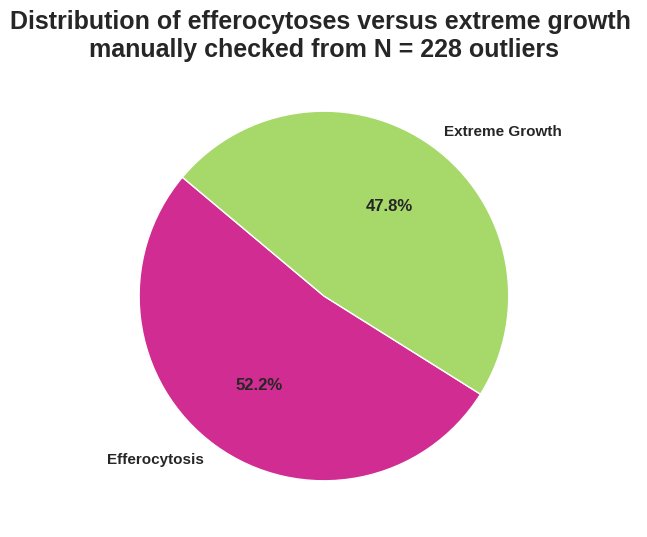

In [183]:
# Calculate the counts of True and False in the 'Uptake' column
uptake_counts = subset_df['Uptake'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
patches, texts, autotexts = plt.pie(uptake_counts, labels=['Efferocytosis', 'Extreme Growth'], autopct='%1.1f%%', startangle=140, colors=[expanded_piyg[-1], expanded_piyg[1]])
for text in texts + autotexts:
    text.set_fontweight('bold')
N = len([i for i in classifications.keys() if classifications[i]['True/False'] == True])
# Add a title
plt.title(f'Distribution of efferocytoses versus extreme growth \nmanually checked from N = {N} outliers',  fontsize=18, fontweight='bold')
plt.savefig(os.path.join(output_dir, 'manual_quant_eff_vs_growth_outliers_overall.png'), bbox_inches = 'tight', dpi = 314)

# Show the pie chart
plt.show()

### Finding outliers

In [75]:
filtered_df[filtered_df["Max. dMtb/dt,T=15"] > 180]['Strain/Compound']

8381      CTRL
8382      CTRL
8383      CTRL
8384      CTRL
8385      CTRL
          ... 
296109     INH
296110     INH
296111     INH
296112     INH
296113     INH
Name: Strain/Compound, Length: 1401, dtype: object

In [73]:
filtered_df[filtered_df["Max. dMtb/dt,T=15"] > 180]['Concentration'].unique()

array(['EC0', 'EC50', 'EC99'], dtype=object)

In [72]:
filtered_df[filtered_df["Max. dMtb/dt,T=15"] > 180]['Unique ID'].unique()

array(['11.4.5', '118.4.5', '131.4.9', '169.6.5', '254.4.5', '264.4.6',
       '289.3.5', '301.4.5', '304.5.5', '327.4.5', '376.5.5', '486.3.5',
       '506.5.5', '587.5.7', '624.5.5', '625.6.5', '671.3.8', '85.4.5',
       '985.3.8'], dtype=object)

In [76]:
for unique_ID in filtered_df[filtered_df["Max. dMtb/dt,T=15"] > 180]['Unique ID'].unique():
    subset = filtered_df[filtered_df['Unique ID'] == unique_ID]
    print("Unique ID:", unique_ID)
    print("Strain/Compound:", subset['Strain/Compound'].iloc[0])
    print("Concentration:", subset['Concentration'].iloc[0])
    print()

Unique ID: 11.4.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 118.4.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 131.4.9
Strain/Compound: BDQ
Concentration: EC50

Unique ID: 169.6.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 254.4.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 264.4.6
Strain/Compound: PZA
Concentration: EC50

Unique ID: 289.3.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 301.4.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 304.5.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 327.4.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 376.5.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 486.3.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 506.5.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 587.5.7
Strain/Compound: RIF
Concentration: EC99

Unique ID: 624.5.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 625.6.5
Strain/Compound: CTRL
Concentration: EC0

Unique ID: 671.3.8
Strain

In [184]:
import shutil

In [192]:
source_fn

'/mnt/DATA/macrohet/PS0000/results/glimpses/fast_grower_area_graph/(4, 5)/11.4.5/ID_11.4.5_dt_1_outlying_growth_glimpse_graph.mp4'

In [193]:
dest_fn

'/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Shared - Nathan Day/1-2-1/231215 1-to-1/ID_11.4.5_dt_1_outlying_growth_glimpse_graph.mp4'

In [199]:
import subprocess

for unique_ID in tqdm(filtered_df[filtered_df["Max. dMtb/dt,T=15"] > 180]['Unique ID'].unique(), 
                      total = len(filtered_df[filtered_df["Max. dMtb/dt,T=15"] > 180]['Unique ID'].unique())):
    fn_search = glob.glob(f'/mnt/DATA/macrohet/PS0000/results/glimpses/fast_grower_area_graph/*/*/*{unique_ID}*.mp4') 
    source_fn = fn_search[0] if len(fn_search) == 1 else print(fn_search)
    dest_dir = '/mnt/DATA/macrohet/PS0000/results/glimpses/temp' #'/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Shared - Nathan Day/1-2-1/231215 1-to-1'
    dest_fn = os.path.join(dest_dir, os.path.basename(source_fn))
    # shutil.copyfile(source_fn, dest_fn)
    try:
        subprocess.run(["cp", source_fn, dest_fn], check=True)
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")

  0%|          | 0/19 [00:00<?, ?it/s]